In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Opens sim file
data = open('DirectModel.inc1.id1.sim', 'r').read()
lines = data.split('\n')

In [3]:
#Creates empty array for x, y, and z value of hits
darrell_arr = np.dtype({"names": ['x_value', 'y_value','z_value'], "formats": [np.float32, np.float32, np.float32]})
xlist = []
ylist = []
zlist = []

#Tallies total hits in detector
c = 0
for l in lines:
    line  = cleanlines(l)
    #print(line[0][2:6])
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        #print(line)
        c +=1
        #Tallies coordinates of hits
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
print(c)
        

useful_arr = np.zeros(len(xlist), darrell_arr)
useful_arr['x_value'] = xlist
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr[:10]

511269


array([( 184.06495667,  727.06262207,  912.33343506),
       ( 301.67245483,  686.6539917 ,   64.15132141),
       ( 548.96105957, -511.02029419,  795.69805908),
       (-748.83093262,   41.85916901,  846.17822266),
       (-735.796875  ,  145.26855469,  111.73886108),
       (-106.89421844,  742.34332275,  470.52770996),
       ( 733.32012939, -157.29469299,  263.87985229),
       (-402.02130127,  633.14996338,  795.78295898),
       ( 224.21499634,  715.70080566,  526.95269775),
       (-586.32067871, -467.6836853 ,  842.56646729)],
      dtype=[('x_value', '<f4'), ('y_value', '<f4'), ('z_value', '<f4')])

In [4]:
#Generates phi -180 to 180 degrees
phi = np.arctan2(useful_arr['y_value'],useful_arr['x_value'])*180/np.pi
phi[:10]

array([  75.79334259,   66.282341  ,  -42.95003891,  176.80052185,
        168.83169556,   98.19402313,  -12.10630989,  122.4136734 ,
         72.6052475 , -141.42208862], dtype=float32)

In [5]:
#Confirms constant r of 750 cm
r = np.sqrt(useful_arr['x_value']**2+useful_arr['y_value']**2)
r[:10]

array([ 750.        ,  750.        ,  750.        ,  749.99993896,
        750.        ,  750.        ,  750.00006104,  750.        ,
        750.        ,  750.        ], dtype=float32)

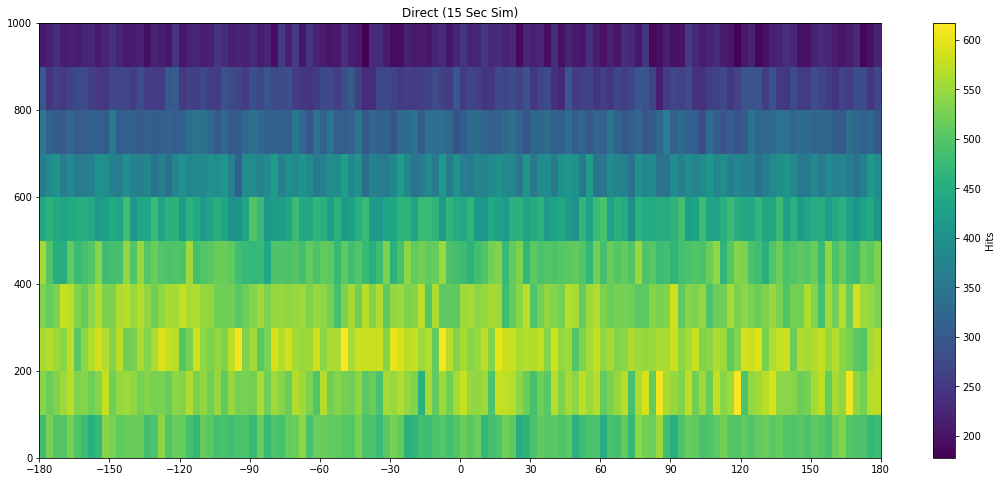

In [15]:
xedges = np.arange(-180.0, 180.1, 3.)
yegdes = np.arange(0., 1000.1, 50.)
heatmap, _, __ = np.histogram2d(phi,useful_arr['z_value'], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Direct (15 Sec Sim)')
plt.savefig('Direct_15sec.png')
plt.show()

In [13]:
np.arange?